# Alternate Graphs to those in Stylometry Notebook, Part 1

1. Import Python libraries

In [7]:
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pandas as pd   #working with dataframes
import nltk           # text analysis / NLP
nltk.download('punkt')
import collections    # for creating frequency lists

from pathlib import Path
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\F0040RP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2. Read in the Federalist Papers

In [8]:
fedpapers_dir = Path("~/shared/RR-workshop-data/federalist-papers").expanduser() 
pathlist = sorted(fedpapers_dir.glob('*.txt'))  

In [9]:
papers = {
    'Madison': [10, 14, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
    'Hamilton': [1, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 21, 22, 23, 24,
                 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60,
                 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
                 78, 79, 80, 81, 82, 83, 84, 85],
    'Jay': [2, 3, 4, 5],
    'Shared': [18, 19, 20],
    'Disputed': [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63],
    'TestCase': [64]
}

authors = ("Hamilton", "Madison", "Disputed", "Jay", "Shared", "TestCase")  ###added in "TestCase"

3. Combine texts written by the same author

In [10]:
def read_files_into_string(filenames):
    strings = []
    #for filename in filenames:
    for filename in filenames:
        #with open(path, 'r') as f:
        #    strings.append(f.read())
        with open(Path(fedpapers_dir, f'federalist_{filename}.txt'), 'r') as f:
            strings.append(f.read())
    return '\n'.join(strings)

In [11]:
federalist_by_author = {}
for author, files in papers.items():
    federalist_by_author[author] = read_files_into_string(files)

4. Create two dataframes:
    + `author_wordlen_df`: stores frequency of words of different lengths for each author
    + `author_df`: stores full-text, tokens, and other data for each author's set of texts

In [28]:
authorlist = []
tok_lens = []
tok_len_freqs = []
for author in authors:
    fulltext = federalist_by_author[author]
    tokens = nltk.word_tokenize(fulltext)
    tok_lengths = [len(token) for token in tokens_no_punct]
    tok_len_dict = dict(collections.Counter(tok_lengths))
    authorlist.extend([author] * len(tok_len_dict.keys()))
    tok_lens.extend(tok_len_dict.keys())
    tok_len_freqs.extend(tok_len_dict.values())

#print(len(authorlist), len(tok_lens), len(tok_len_freqs))
author_wordlen_df = pd.DataFrame({'author': authorlist, 'tok_lens': tok_lens, 'freq': tok_len_freqs})
author_wordlen_df.head()

96 96 96


,author,tok_lens,freq
0,Hamilton,2,493
1,Hamilton,3,483
2,Hamilton,6,166
3,Hamilton,4,388
4,Hamilton,11,47


In [27]:
data_all_authors = []
for author in authors:
    fulltext = federalist_by_author[author]
    tokens = nltk.word_tokenize(fulltext)
    tokens_no_punct = [token for token in tokens if any(c.isalnum() for c in token)]
    data_this_author = [author, fulltext, tokens_no_punct, tok_len_dict]
    data_all_authors.append(data_this_author)

author_df = pd.DataFrame(data_all_authors, columns = ["author", "fulltext", "tokens_no_punct", "tok_len_distribs"])
author_df.head()


,author,fulltext,tokens_no_punct,tok_len_distribs
0,Hamilton,1\n\nGeneral Introduction\n\nFor the Independ...,"[1, General, Introduction, For, the, Independe...","{2: 493, 3: 483, 6: 166, 4: 388, 11: 47, 7: 15..."
1,Madison,10\n\nThe Same Subject Continued (The Union a...,"[10, The, Same, Subject, Continued, The, Union...","{2: 493, 3: 483, 6: 166, 4: 388, 11: 47, 7: 15..."
2,Disputed,49\n\nMethod of Guarding Against the Encroach...,"[49, Method, of, Guarding, Against, the, Encro...","{2: 493, 3: 483, 6: 166, 4: 388, 11: 47, 7: 15..."
3,Jay,2\n\nConcerning Dangers from Foreign Force an...,"[2, Concerning, Dangers, from, Foreign, Force,...","{2: 493, 3: 483, 6: 166, 4: 388, 11: 47, 7: 15..."
4,Shared,18\n\nThe Same Subject Continued (The Insuffi...,"[18, The, Same, Subject, Continued, The, Insuf...","{2: 493, 3: 483, 6: 166, 4: 388, 11: 47, 7: 15..."


5. Calculate the total number of words in all papers written by each author

In [14]:
word_cts = author_wordlen_df.groupby('author')['freq'].sum()
word_cts = word_cts.rename("word_cts")
word_cts

author
Disputed     27164
Hamilton    127314
Jay           6901
Madison      43824
Shared        6583
TestCase      2594
Name: word_cts, dtype: int64

6. Calculate percentages of words of different length within each author's corpus.

In [16]:
author_wordlen_df = author_wordlen_df.merge(word_cts, how = "inner", left_on = "author", right_index = True)
author_wordlen_df.head()

,author,tok_lens,freq,word_cts
0,Hamilton,1,15431,127314
1,Hamilton,7,7575,127314
2,Hamilton,12,1557,127314
3,Hamilton,3,21873,127314
4,Hamilton,11,2648,127314


In [17]:
author_wordlen_df['pct'] = author_wordlen_df['freq'] / author_wordlen_df['word_cts'] * 100
author_wordlen_df.head()

,author,tok_lens,freq,word_cts,pct
0,Hamilton,1,15431,127314,12.120427
1,Hamilton,7,7575,127314,5.949856
2,Hamilton,12,1557,127314,1.222961
3,Hamilton,3,21873,127314,17.180357
4,Hamilton,11,2648,127314,2.079897


7. Create a basic line plot using Seaborn (sns)

<Axes: xlabel='tok_lens', ylabel='pct'>

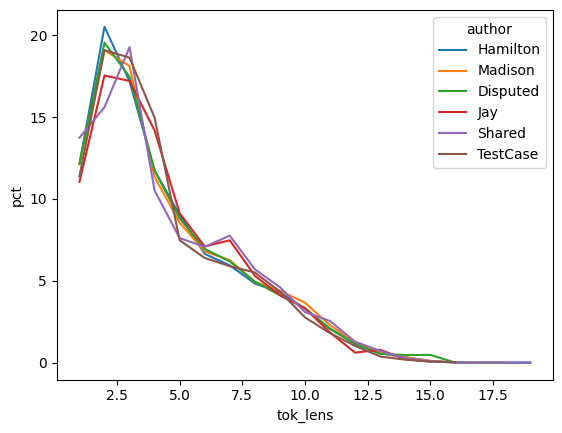

In [18]:
sns.lineplot(author_wordlen_df, x = 'tok_lens', y = 'pct', hue = 'author')


8. Create a series of mini-plots to enable comparison.

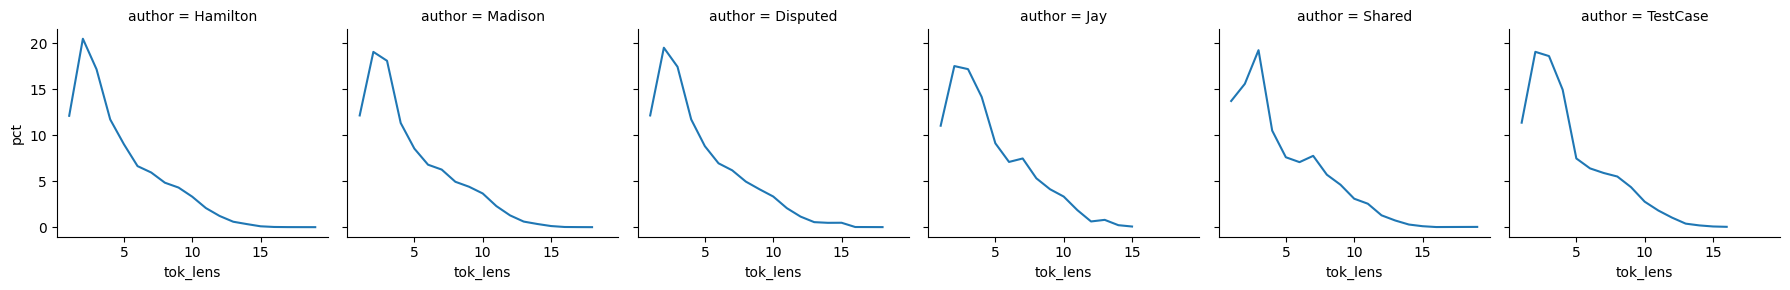

In [19]:
g = sns.FacetGrid(author_wordlen_df, col = "author")
g.map_dataframe(sns.lineplot, x = 'tok_lens', y = 'pct')

9. Using **plotly express** (px) create an interactive line plot.

In [20]:
author_wordlen_df = author_wordlen_df.sort_values(by = ["author", "tok_lens"])

In [21]:
fig = px.line(author_wordlen_df, x = "tok_lens", y = "pct", color = "author")
fig.update_layout(width = 1500, height = 1500)
fig.show()

10. Subset the corpus to focus on texts by Hamilton, Jay, and Madison to compare to Federalist Paper #64 ("TestCase" here).

In [23]:
fig = px.line(author_wordlen_df[author_wordlen_df["author"].isin(["Jay", "Madison", "Hamilton", "TestCase"])], x = "tok_lens", y = "pct", color = "author")
fig.update_layout(width = 1500, height = 1500)
fig.show()